In [2]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import keras

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train.shape

170500096/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

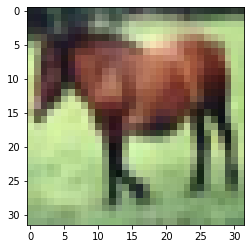

In [4]:
plt.imshow(x_train[7])

In [0]:
x_train=x_train/256
x_test=x_test/256

In [0]:
y_train_cat=keras.utils.to_categorical(y_train)
y_test_cat=keras.utils.to_categorical(y_test)

In [7]:
y_train_cat.shape

(50000, 10)

In [0]:
from keras.layers import *
from keras.activations import *
from keras.losses import *
from keras.metrics import *
from keras.optimizers import *
from keras.models import *

In [0]:
sh=x_train.shape[1:]
batch=100
n_output=len(np.unique(y_train))

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)
inp=Input(shape=sh)
conv1=Conv2D(filters=64,kernel_size=3,strides=2,padding="same")(inp) #strides-шаг
conv1=Activation('relu')(conv1)

conv2=Conv2D(filters=64,kernel_size=3,strides=2,padding="same")(conv1)
conv2=Activation('relu')(conv2)

flat=Flatten()(conv2)
out=Dense(n_output,activation="softmax")(conv2)
model=Model(inputs=inp,outputs=out)

In [16]:
inp=Input(shape=sh)
conv1=Conv2D(filters=64,kernel_size=3,strides=2,padding="same")(inp) #strides-шаг
conv1=Activation('relu')(conv1)
conv1=MaxPool2D(2)(conv1)
conv1=Dropout(rate=0.5)
conv2=Conv2D(filters=64,kernel_size=3,strides=2,padding="same")(conv1)
conv2=Activation('relu')(conv2)
conv2=MaxPool2D(2)(conv2)
flat=Flatten()(conv2)
out=Dense(n_output,activation="softmax")(conv2)
model=Model(inputs=inp,outputs=out)

ValueError: ignored

In [0]:
model.compile(RMSprop(lr=0.1),loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [0]:
model.fit(x_train,y_train_cat,epochs=100,verbose=2,validation_data=(x_test,y_test_cat))